In [3]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = project_path.joinpath("scripts/run_bench_mr.py").as_posix()
os.environ["MPB_BINARY_DIR"] = project_path.joinpath("benchmark/third_party/bench-mr/bin").as_posix()
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()

scenario_path = project_path.joinpath("benchmark/third_party/bench-mr/bin/moving_ai_scenarios")


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

# Run one experiment

In [9]:
m = MPB()
m["benchmark.moving_ai.active"] = True
m["benchmark.moving_ai.create_border"] = False
i = -2
m["benchmark.moving_ai.start"] = i
m["benchmark.moving_ai.end"] = i + 1
m["benchmark.moving_ai.scenario"] = scenario_path.joinpath("Berlin_0_256.map.scen").as_posix() 

m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m["steer.car_turning_radius"] = 4
m["sbpl.scaling"] = 1
# m.set_planners(['constrained_onf_planner', 'bfmt', 'cforest', 'prm', 'prm_star', 'informed_rrt_star', 'sbpl_mha'])
# m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha'])
m.set_planners(['constrained_onf_planner'])
m.run(id="movingai", runs=1)

Running MPB with ID movingai (log file at movingai.log)...


0

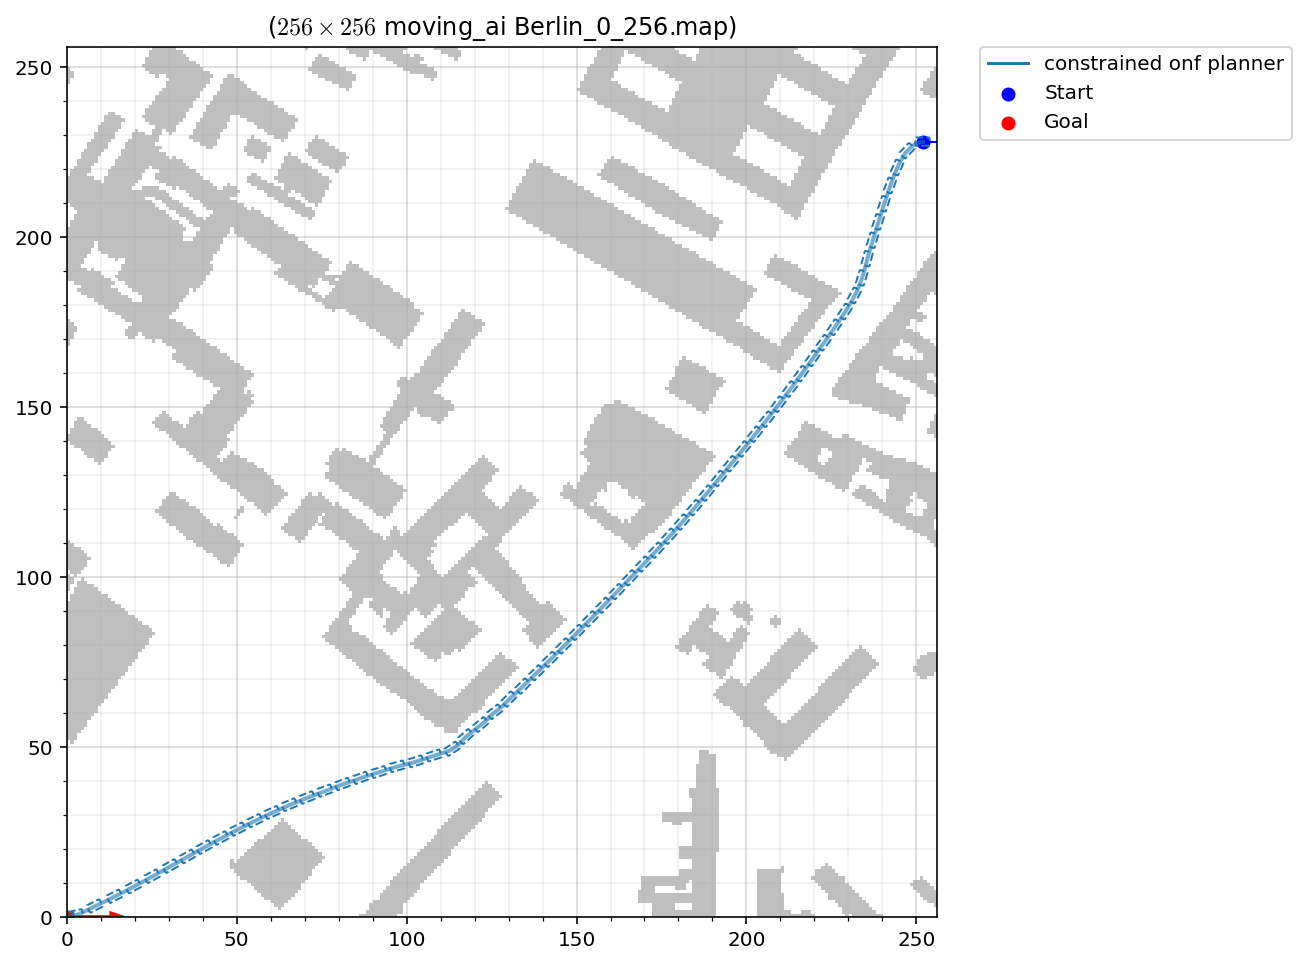

In [10]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/movingai_experiment.pdf",
                         num_colors=10)

Available memory: 2.60 GB, limiting each MPB process to 62.5% usage (1.63 GB).
Creating pool of 1 processes.
Running MPB with ID movingai_pool_0 (log file at movingai_pool/movingai_pool_0.log)...



Benchmark 0 (movingai_pool_0) finished successfully.
Running MPB with ID movingai_pool_1 (log file at movingai_pool/movingai_pool_1.log)...



Benchmark 1 (movingai_pool_1) finished successfully.
Running MPB with ID movingai_pool_2 (log file at movingai_pool/movingai_pool_2.log)...



Benchmark 2 (movingai_pool_2) finished successfully.
Running MPB with ID movingai_pool_3 (log file at movingai_pool/movingai_pool_3.log)...



Benchmark 3 (movingai_pool_3) finished successfully.
Running MPB with ID movingai_pool_4 (log file at movingai_pool/movingai_pool_4.log)...



Benchmark 4 (movingai_pool_4) finished successfully.
Running MPB with ID movingai_pool_5 (log file at movingai_pool/movingai_pool_5.log)...



Benchmark 5 (movingai_pool_5) finished successfully.
Running MPB with ID movingai_pool_6 (log file at movingai_pool/movingai_pool_6.log)...



Benchmark 6 (movingai_pool_6) finished successfully.
Running MPB with ID movingai_pool_7 (log file at movingai_pool/movingai_pool_7.log)...



Benchmark 7 (movingai_pool_7) finished successfully.
Running MPB with ID movingai_pool_8 (log file at movingai_pool/movingai_pool_8.log)...



Benchmark 8 (movingai_pool_8) finished successfully.
Running MPB with ID movingai_pool_9 (log file at movingai_pool/movingai_pool_9.log)...



Benchmark 9 (movingai_pool_9) finished successfully.
All benchmarks succeeded.


True

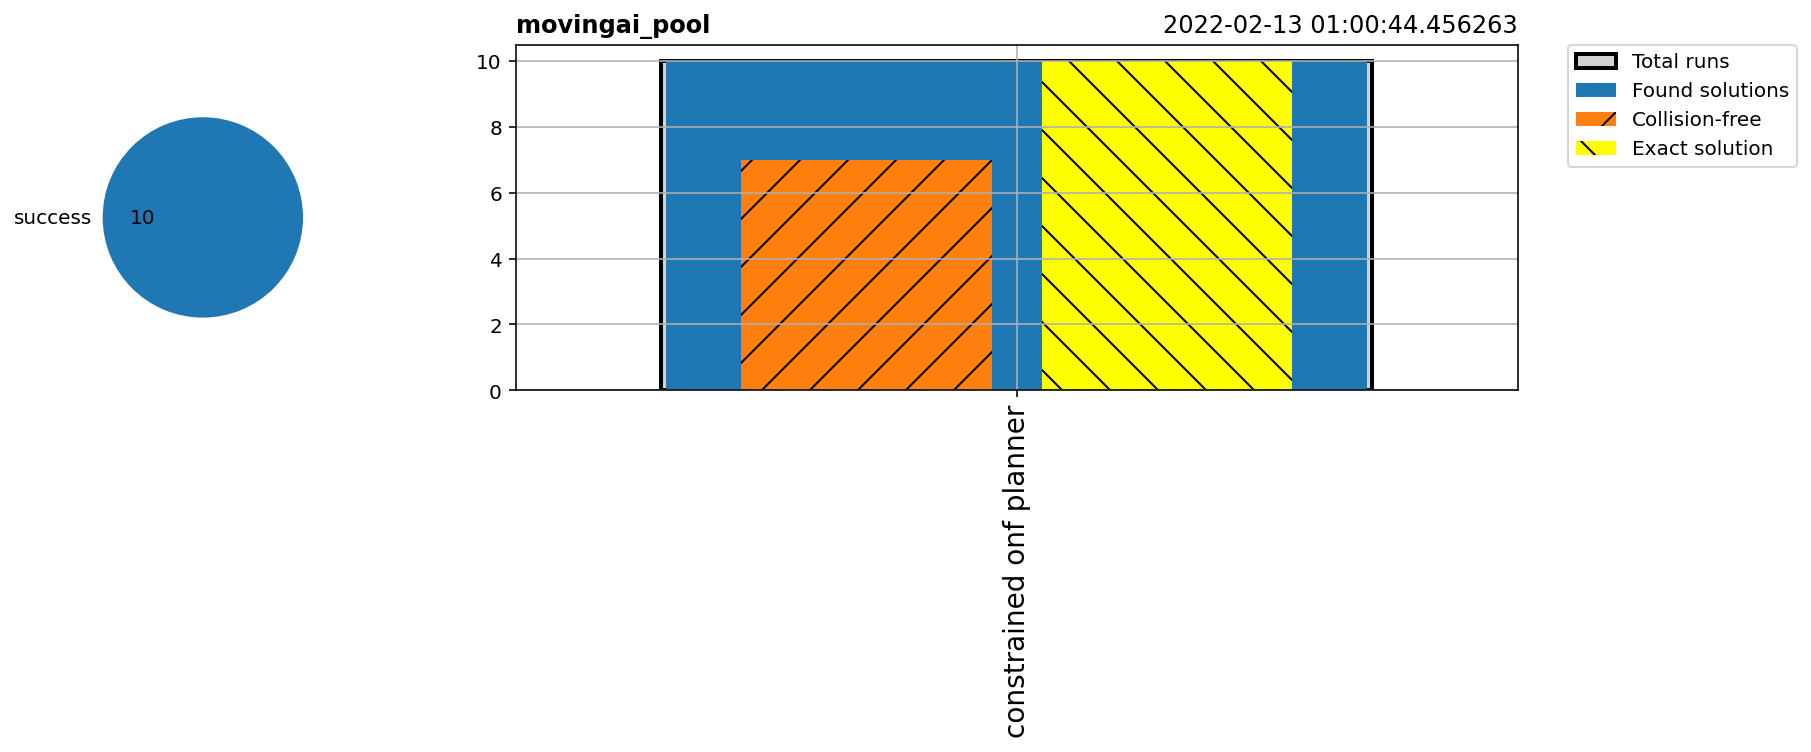

In [5]:
env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for i in range(10):
    m = MPB()
    m["benchmark.moving_ai.active"] = True
    m["benchmark.moving_ai.create_border"] = False
    m["benchmark.moving_ai.start"] = -i - 1
    m["benchmark.moving_ai.end"] = -i
    m["benchmark.moving_ai.scenario"] = scenario_path.joinpath("Berlin_0_256.map.scen").as_posix()  

    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m["steer.car_turning_radius"] = 2
    m["sbpl.scaling"] = 1
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)

pool.run_parallel(id="movingai_pool", runs=1, processes=1)

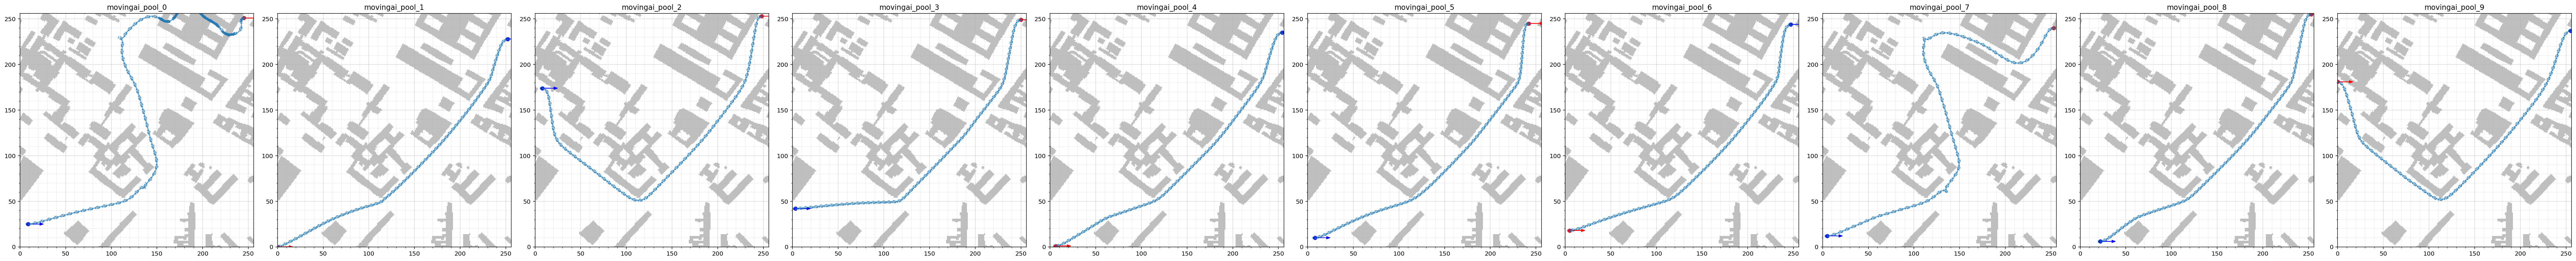

In [6]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/movingai_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [movingai_pool/movingai_pool_0_results.json, movingai_pool/movingai_pool_1_results.json, movingai_pool/movingai_pool_2_results.json, movingai_pool/movingai_pool_3_results.json, movingai_pool/movingai_pool_4_results.json, movingai_pool/movingai_pool_5_results.json, movingai_pool/movingai_pool_6_results.json, movingai_pool/movingai_pool_7_results.json, movingai_pool/movingai_pool_8_results.json, movingai_pool/movingai_pool_9_results.json] into movingai_results.json.
Visualizing movingai_results.json...


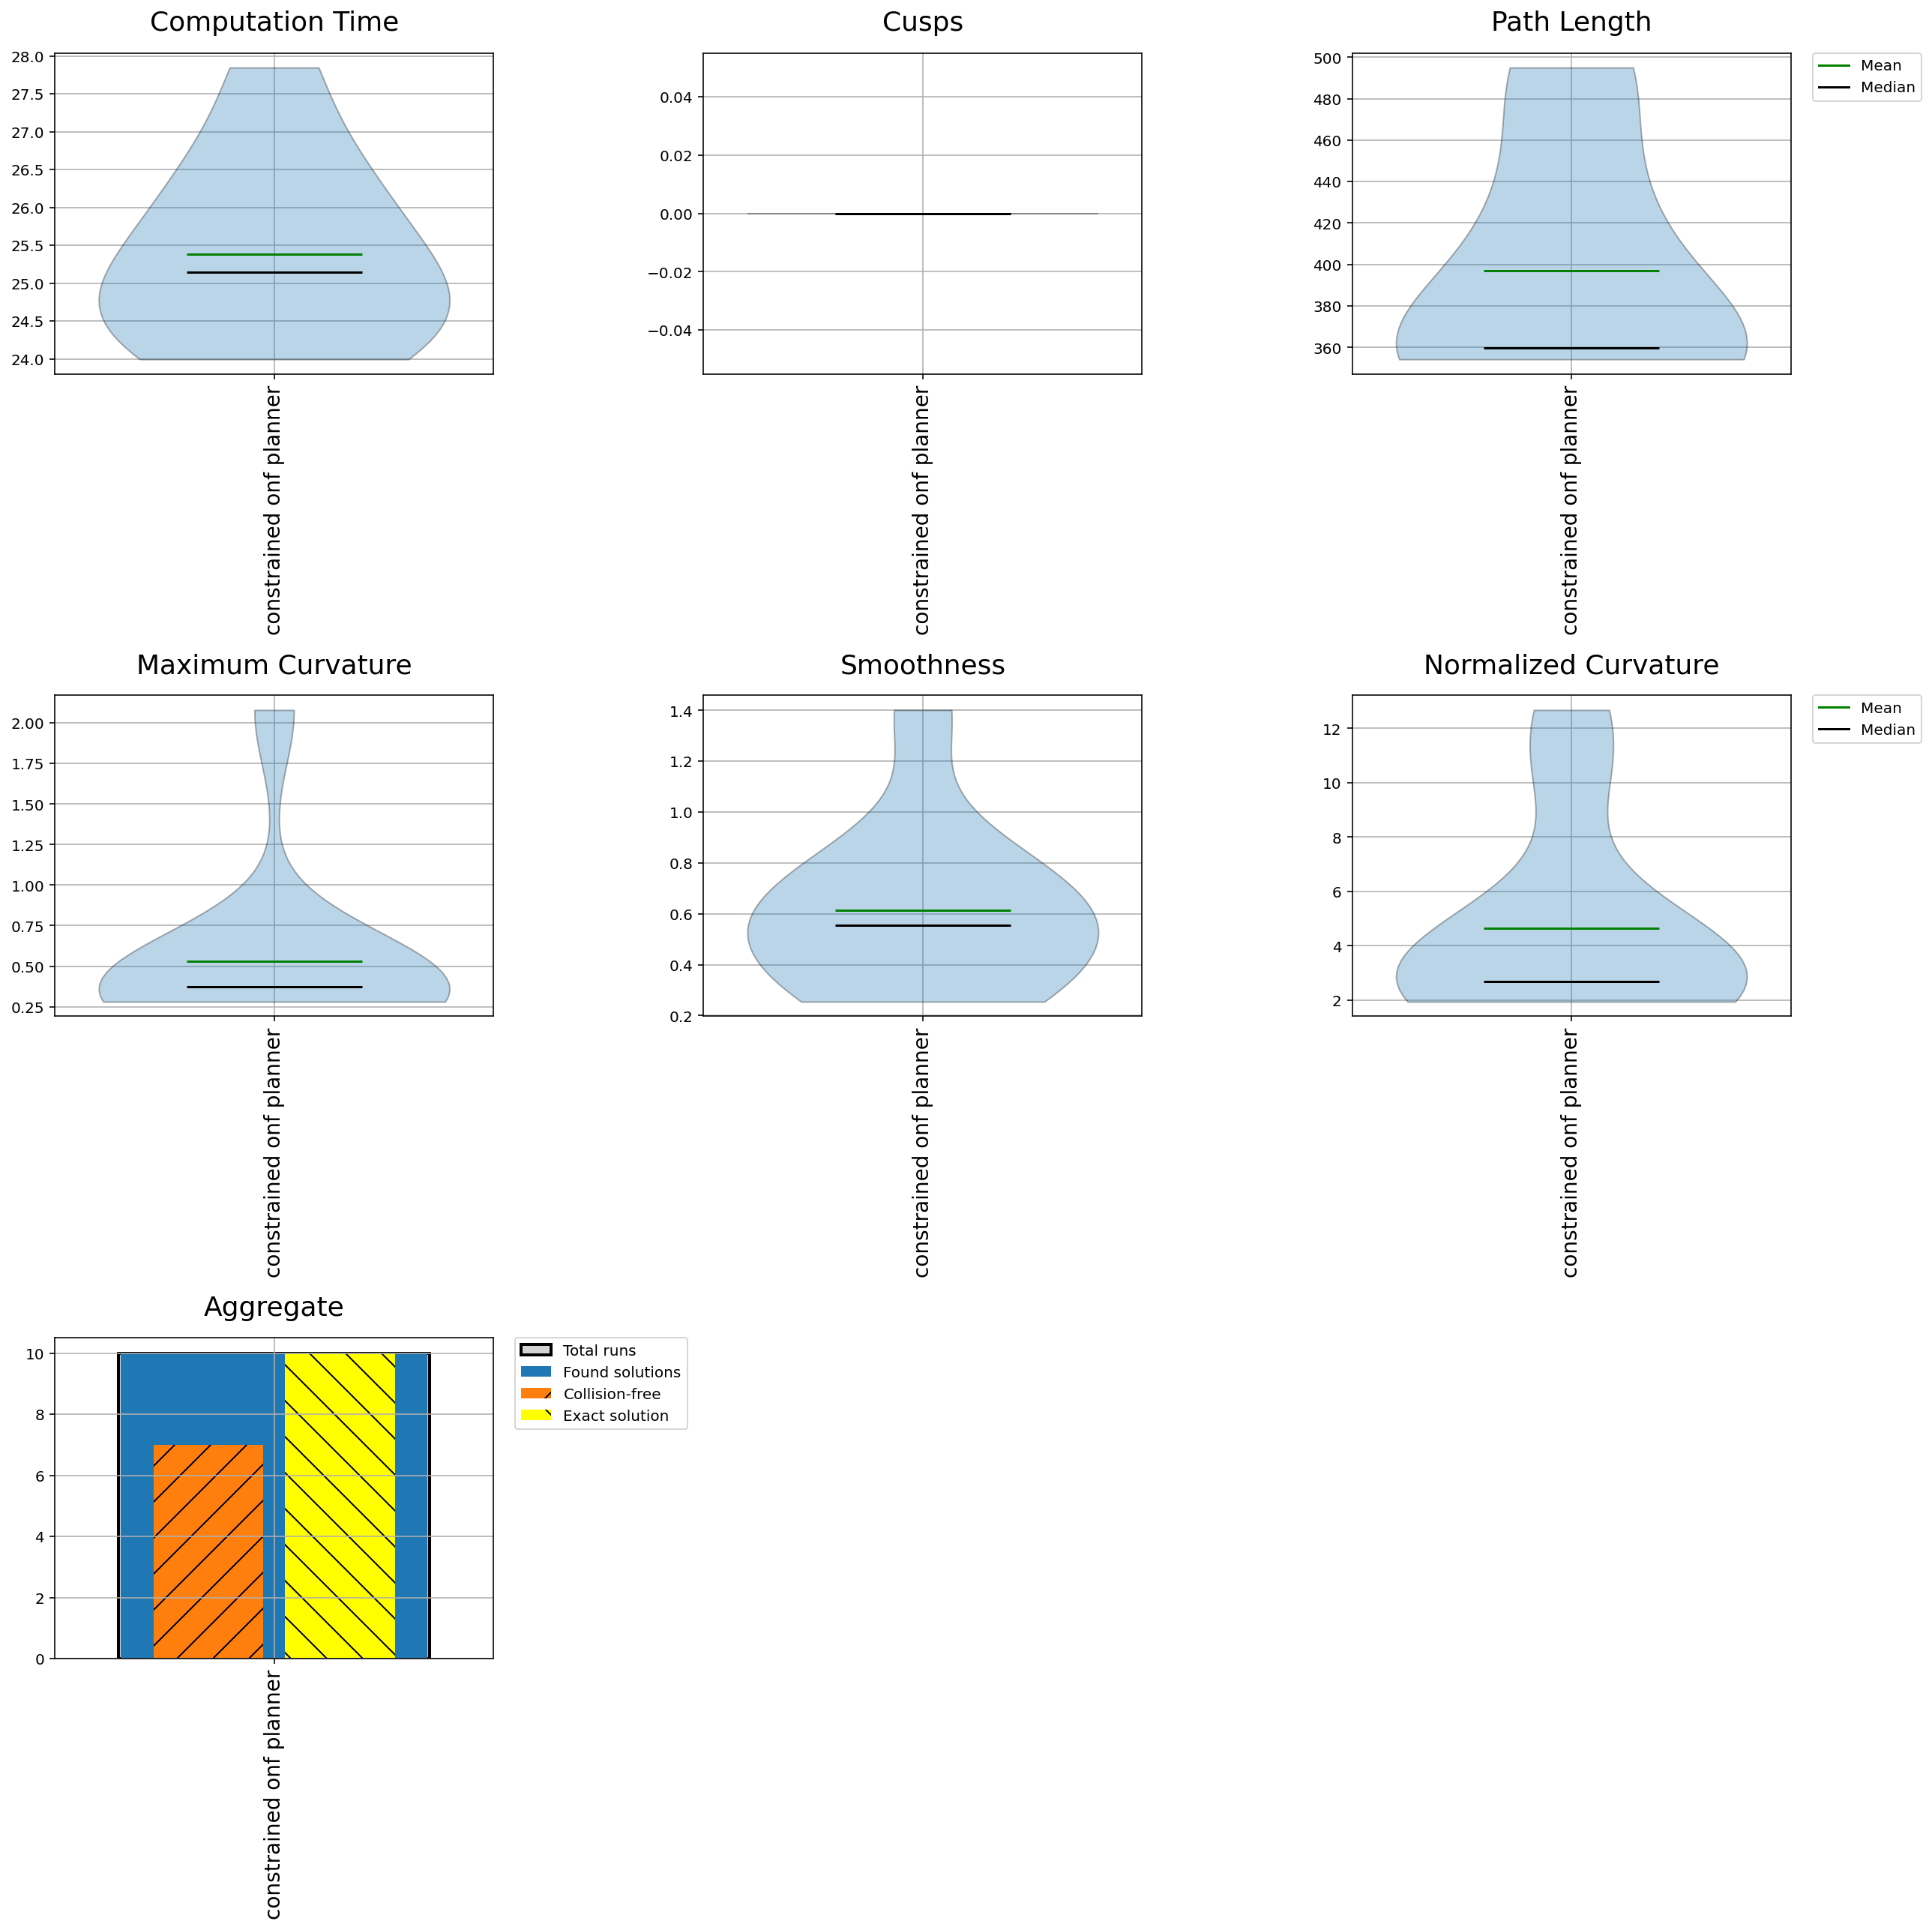

In [7]:
result = "movingai_results.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="planning_time, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")